In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('produce_data.csv')

In [3]:
df.columns

Index(['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average'], dtype='object')

In [4]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [5]:
df.isnull().sum()

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [6]:
# Convert to date format
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Make the date the index
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [18]:
df = df.sort_index()

In [20]:
# Assuming 'df' is your DataFrame
# Filter to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Perform the resampling and mean calculation on the numeric data
df_resampled = numeric_df.resample('D').mean()

# If you need to keep the non-numeric columns, you can merge them back later
non_numeric_df = df.select_dtypes(exclude=['number'])
df_resampled = df_resampled.merge(non_numeric_df, left_index=True, right_index=True, how='left')

# Check the result
print(df_resampled.head())

              SN    Minimum    Maximum    Average            Commodity Unit  \
Date                                                                          
2013-06-16  36.5  63.459459  73.689189  68.574324   Tomato Big(Nepali)   Kg   
2013-06-16  36.5  63.459459  73.689189  68.574324  Tomato Small(Local)   Kg   
2013-06-16  36.5  63.459459  73.689189  68.574324           Potato Red   Kg   
2013-06-16  36.5  63.459459  73.689189  68.574324         Potato White   Kg   
2013-06-16  36.5  63.459459  73.689189  68.574324   Onion Dry (Indian)   Kg   

                               Category            Detailed Category  
Date                                                                  
2013-06-16  Vegetable - Hybrid/Regional  Vegetable - Hybrid/Regional  
2013-06-16                    Vegetable                    Vegetable  
2013-06-16                    Vegetable                    Vegetable  
2013-06-16                    Vegetable                    Vegetable  
2013-06-16  Vegetabl

In [23]:
df_resampled = df_resampled.dropna(subset=['Maximum'])

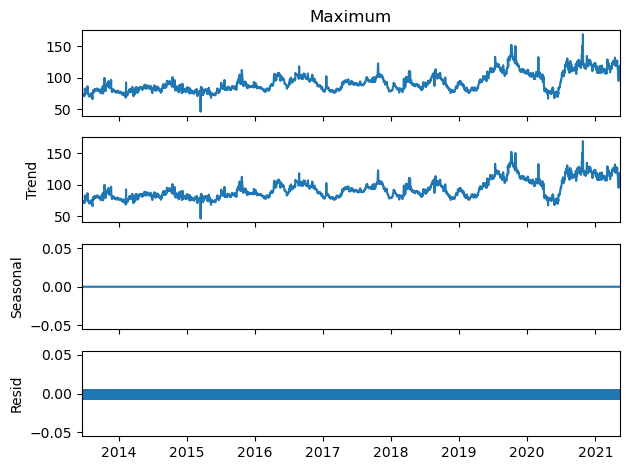

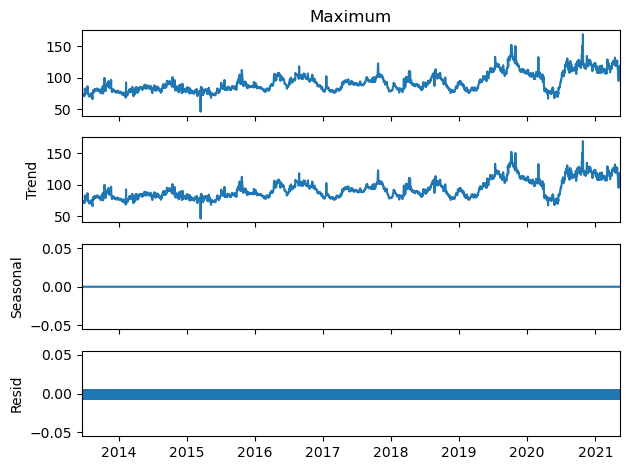

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Interpolate missing values
df_resampled['Maximum'] = df_resampled['Maximum'].interpolate()

# Perform seasonal decomposition
result = seasonal_decompose(df_resampled['Maximum'], model='additive', period=1)

# Plot the decomposed components
result.plot()


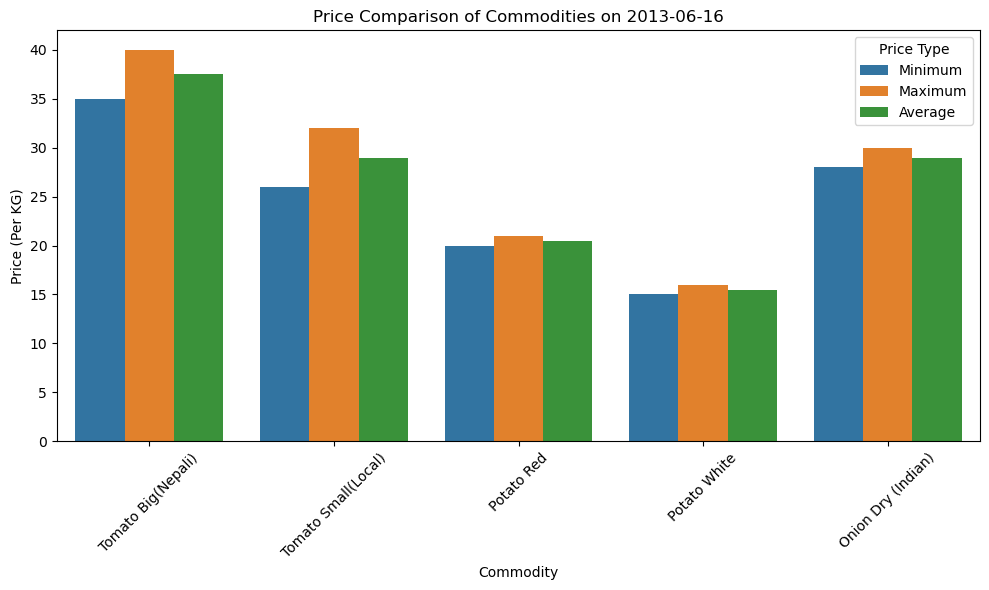

In [8]:
# Create a DataFrame manually with your provided data
data = pd.DataFrame({
    'Commodity': ['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red', 'Potato White', 'Onion Dry (Indian)'],
    'Date': ['2013-06-16']*5,
    'Unit': ['Kg']*5,
    'Minimum': [35.0, 26.0, 20.0, 15.0, 28.0],
    'Maximum': [40.0, 32.0, 21.0, 16.0, 30.0],
    'Average': [37.5, 29.0, 20.5, 15.5, 29.0]
})

# Melt the DataFrame to make it suitable for sns.barplot
data_melted = data.melt(id_vars=['Commodity'], value_vars=['Minimum', 'Maximum', 'Average'],
                        var_name='Price Type', value_name='Price')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Commodity', y='Price', hue='Price Type', data=data_melted)
plt.title('Price Comparison of Commodities on 2013-06-16')
plt.xticks(rotation=45)
plt.ylabel('Price (Per KG)')
plt.xlabel('Commodity')
plt.legend(title='Price Type')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
x = df['Commodity'].unique()

In [10]:
# Enhanced categorization function
def categorize_commodity(name):
        """
    Categorize a commodity based on its name.

    This function categorizes commodities into various categories such as 
    Fruits, Vegetables, Spices and Herbs, Legumes, Roots and Tubers, 
    Specialty Items, Animal Products, and Processed or Fermented items based 
    on keywords in their names.

    Parameters:
    name (str): The name of the commodity to categorize.

    Returns:
    str: The category of the commodity.

    Categories:
    - 'Fruit': General fruit category.
    - 'Fruit - Specialty': Specific types of fruits (e.g., 'Fuji Apple').
    - 'Vegetable': General vegetable category.
    - 'Vegetable - Hybrid/Regional': Specific types of vegetables (e.g., 'Hybrid Tomato').
    - 'Spices and Herbs': General spices and herbs category.
    - 'Spices and Herbs - Variety': Specific types of spices and herbs (e.g., 'Green Garlic').
    - 'Legumes': General legumes category.
    - 'Legumes - Specialty': Specific types of legumes (e.g., 'Rajma Bean').
    - 'Roots and Tubers': General roots and tubers category.
    - 'Specialty Items': Specialty food items (e.g., 'Kiwi').
    - 'Animal Products': General animal products category.
    - 'Animal Products - Fresh Fish': Fresh fish products.
    - 'Processed or Fermented': Processed or fermented food items (e.g., 'Tofu').
    - 'Other': Category for items that do not fit into the above categories.

    Examples:
    >>> categorize_commodity('Apple Fuji')
    'Fruit - Specialty'
    >>> categorize_commodity('Tomato Hybrid')
    'Vegetable - Hybrid/Regional'
    >>> categorize_commodity('Ginger Green')
    'Spices and Herbs - Variety'
    # Fruits
    if 'Apple' in name or 'Banana' in name or 'Orange' in name or 'Mango' in name or 'Grapes' in name or 'Melon' in name or 'Pomegranate' in name or 'Lime' in name:
        if 'Fuji' in name or 'Maldah' in name or 'Calcutte' in name or 'Chousa' in name or 'Dushari' in name:
            return 'Fruit - Specialty'
        return 'Fruit'
    
    # Vegetables
    elif 'Tomato' in name or 'Potato' in name or 'Onion' in name or 'Carrot' in name or 'Cabbage' in name or 'Cauli' in name or 'Gourd' in name or 'Raddish' in name:
        if 'Hybrid' in name or 'Tunnel' in name or 'Terai' in name or 'Indian' in name or 'Nepali' in name or 'Chinese' in name:
            return 'Vegetable - Hybrid/Regional'
        return 'Vegetable'
    
    # Spices and Herbs
    elif 'Garlic' in name or 'Ginger' in name or 'Chilli' in name or 'Coriander' in name:
        if 'Green' in name or 'Dry' in name or 'Chinese' in name or 'Nepali' in name:
            return 'Spices and Herbs - Variety'
        return 'Spices and Herbs'
    
    # Legumes
    elif 'Pea' in name or 'Bean' in name:
        if 'Rajma' in name or 'Hybrid' in name:
            return 'Legumes - Specialty'
        return 'Legumes'
    
    # Roots and Tubers
    elif 'Yam' in name or 'Sweet Potato' in name:
        return 'Roots and Tubers'
    
    # Specialty Items
    elif 'Kiwi' in name or 'Musk Melon' in name or 'Bamboo Shoot' in name:
        return 'Specialty Items'
    
    # Animal Products (if applicable)
    elif 'Fish' in name:
        if 'Fresh' in name:
            return 'Animal Products - Fresh Fish'
        return 'Animal Products'
    
    # Processed or Fermented
    elif 'Tofu' in name or 'Gundruk' in name:
        return 'Processed or Fermented'
    
    else:
        return 'Other'

# Apply categorization
df['Category'] = df['Commodity'].apply(categorize_commodity)
    
# Apply enhanced categorization
df['Detailed Category'] = df['Commodity'].apply(categorize_commodity)

# Check the categorization
print(df[['Commodity', 'Category', 'Detailed Category']].head())

# Apply categorization
df['Category'] = df['Commodity'].apply(categorize_commodity)


                      Commodity                     Category  \
Date                                                           
2013-06-16   Tomato Big(Nepali)  Vegetable - Hybrid/Regional   
2013-06-16  Tomato Small(Local)                    Vegetable   
2013-06-16           Potato Red                    Vegetable   
2013-06-16         Potato White                    Vegetable   
2013-06-16   Onion Dry (Indian)  Vegetable - Hybrid/Regional   

                      Detailed Category  
Date                                     
2013-06-16  Vegetable - Hybrid/Regional  
2013-06-16                    Vegetable  
2013-06-16                    Vegetable  
2013-06-16                    Vegetable  
2013-06-16  Vegetable - Hybrid/Regional  


In [11]:
df['Detailed Category'].unique()

array(['Vegetable - Hybrid/Regional', 'Vegetable', 'Other', 'Legumes',
       'Specialty Items', 'Processed or Fermented', 'Fruit',
       'Fruit - Specialty', 'Spices and Herbs',
       'Spices and Herbs - Variety', 'Animal Products - Fresh Fish',
       'Roots and Tubers', 'Legumes - Specialty'], dtype=object)

In [12]:
x

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [13]:
df['Category'].unique()

array(['Vegetable - Hybrid/Regional', 'Vegetable', 'Other', 'Legumes',
       'Specialty Items', 'Processed or Fermented', 'Fruit',
       'Fruit - Specialty', 'Spices and Herbs',
       'Spices and Herbs - Variety', 'Animal Products - Fresh Fish',
       'Roots and Tubers', 'Legumes - Specialty'], dtype=object)

In [14]:
y = df[df['Category'] == 'Vegetable']

In [15]:
y.head(20)

,SN,Commodity,Unit,Minimum,Maximum,Average,Category,Detailed Category
Date,,,,,,,,
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0,Vegetable,Vegetable
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5,Vegetable,Vegetable
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5,Vegetable,Vegetable
2013-06-16,5,Carrot(Local),Kg,30.0,35.0,32.5,Vegetable,Vegetable
2013-06-16,6,Cabbage(Local),Kg,6.0,10.0,8.0,Vegetable,Vegetable
2013-06-16,7,Cauli Local,Kg,30.0,35.0,32.5,Vegetable,Vegetable
2013-06-16,8,Raddish Red,Kg,35.0,40.0,37.5,Vegetable,Vegetable
2013-06-16,9,Raddish White(Local),Kg,25.0,30.0,27.5,Vegetable,Vegetable
2013-06-16,16,Bitter Gourd,Kg,14.0,16.0,15.0,Vegetable,Vegetable


In [ ]:
Test_Case.head(10)